In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
from collections import Counter
from sklearn.cluster import BisectingKMeans
import pandas as pd
from src.utils_clustering import *
import time

In [60]:
N_CLASSES = 15

In [61]:
DATASET_FILE_NAME = "s1"
file_path = rf'..\data\processed\{DATASET_FILE_NAME}.txt'
processed_data = pd.read_csv(file_path)

In [62]:
# Start measuring time
start_time = time.time()

bisecting_kmeans_clustering = BisectingKMeans(n_clusters=N_CLASSES, random_state=42, init='k-means++', n_init=100)
labels_pred = bisecting_kmeans_clustering.fit_predict(processed_data)

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time
running_time_in_seconds = running_time / 60
running_time_in_seconds

0.08122219642003377

In [63]:
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ",cluster_distribution)

Predicted Distribution:  Counter({3: 359, 2: 355, 5: 355, 14: 354, 10: 346, 8: 341, 12: 340, 13: 338, 11: 335, 9: 329, 1: 327, 0: 322, 7: 311, 4: 296, 6: 292})


In [64]:
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)

Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


In [65]:
clustering_algorithm_name = 'BisectingKMeans_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'

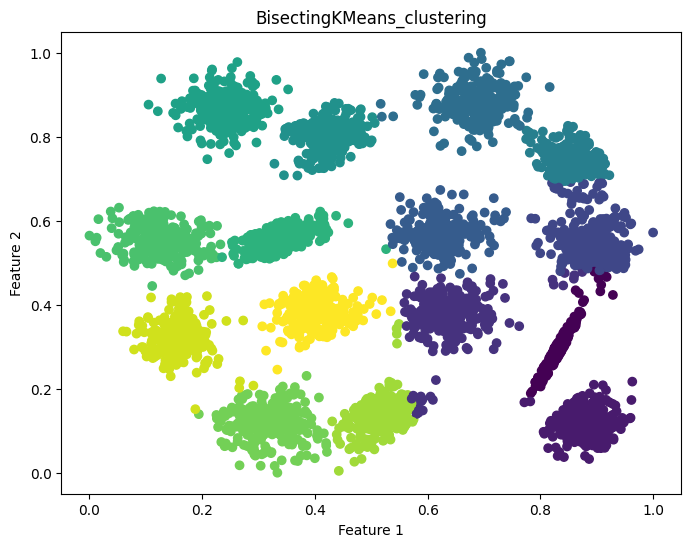

In [66]:
plot_clusters(processed_data, labels_pred, title=clustering_algorithm_name)

In [67]:
labels_pred = map_clusters_to_ground_truth(labels_true, labels_pred)

Confusion Matrix:


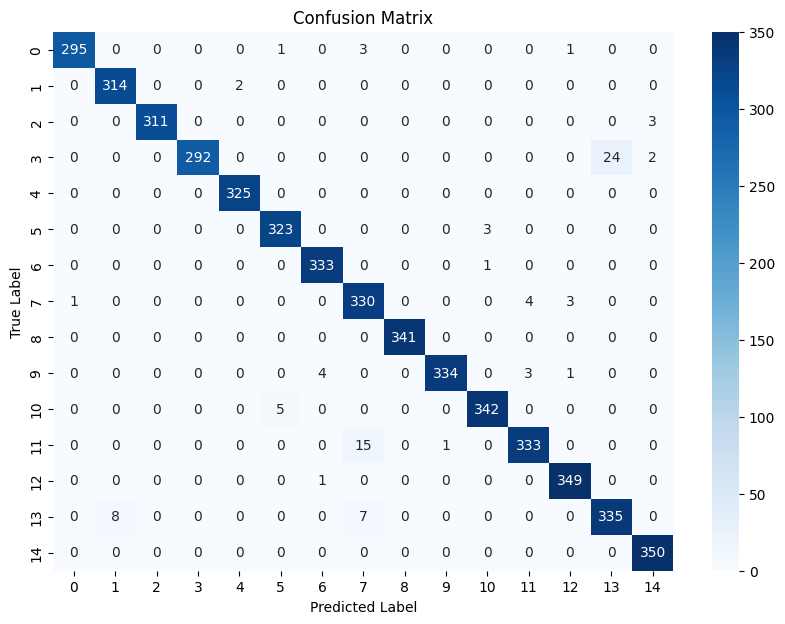


Overall Accuracy: 98.14%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [68]:
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)

In [69]:
algorithm_params = bisecting_kmeans_clustering.get_params()
algorithm_details = str(algorithm_params)

In [70]:
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name, 
                    results_path=results_path, algorithm_details=algorithm_details, 
                    running_time=running_time)

Timestamp: 2024-02-07 13:08:25.566147
Dataset: s1
Clustering Algorithm: BisectingKMeans_clustering
Algorithm Details: {'algorithm': 'lloyd', 'bisecting_strategy': 'biggest_inertia', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 15, 'n_init': 100, 'random_state': 42, 'tol': 0.0001, 'verbose': 0}
Running Time (seconds): 4.873331785202026
Accuracy: 0.9814
